In [108]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as ur
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statistics as st
import itertools as it
import statsmodels.api as sm


%matplotlib inline

In [75]:
def get_financials(ticker2):
    bs = requests.get('https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/' +ticker2)
    bs = bs.json()
    bs = bs['financials']
    bs = pd.DataFrame.from_dict(bs)
    bs = bs.T
    bs.columns = bs.iloc[0]
    return bs


In [76]:
def get_growthrate(financials, p=1):
    seq = financials.loc['Total shareholders equity', :].reset_index()
    seq['date'] = pd.to_datetime(seq['date'])
    seq['Total shareholders equity'] = pd.to_numeric(seq['Total shareholders equity'],errors='coerce')
    seq = seq.sort_values('date', ascending=True)
    growth_df = seq.set_index('date').resample('A').sum()['Total shareholders equity'].pct_change(periods=p)
#     seq.set_index('date').resample('A').sum().plot()
    print(growth_df)
    return growth_df
    

date
2009-12-31         NaN
2010-12-31         NaN
2011-12-31         NaN
2012-12-31         NaN
2013-12-31         NaN
2014-12-31    0.104623
2015-12-31    0.015176
2016-12-31    0.084872
2017-12-31    0.288076
2018-12-31    0.260800
2019-12-31    0.468291
Freq: A-DEC, Name: Total shareholders equity, dtype: float64


0.2036396752995486

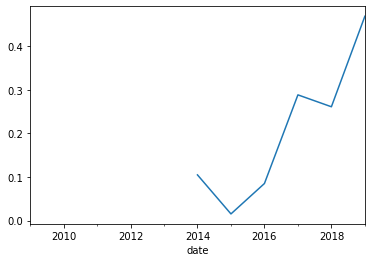

In [78]:
ticker = 'rcl'
fin = get_financials(ticker)
company_growth = get_growthrate(fin, p=5)
company_growth.plot()
company_growth.mean()

In [79]:
def get_income_statement(ticker2):
    income_statement = requests.get('https://financialmodelingprep.com/api/v3/financials/income-statement/' +ticker2)
    income_statement = income_statement.json()
    income_statement = income_statement['financials']
    income_statement = pd.DataFrame.from_dict(income_statement)
    income_statement = income_statement.T
    income_statement.columns = income_statement.iloc[0]
    return income_statement

In [80]:
inc = get_income_statement(ticker)
inc

date,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,2012-12-31,2011-12-31,2010-12-31,2009-12-31
date,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,2012-12-31,2011-12-31,2010-12-31,2009-12-31
Revenue,7857057000.0,9493849000.0,8777845000.0,8496401000.0,8299074000.0,8073855000.0,7959894000.0,7688024000.0,7537263000.0,6752504000.0,5889826000.0
Revenue Growth,-0.172405522776,0.0815694512719,0.033125084374,0.0237769900594,0.0278948532021,0.0143168991949,0.0353627928321,0.0200020882912,0.116217480212,0.146469182621,-0.0984
Cost of Revenue,1656297000.0,5262207000.0,4896579000.0,5015539000.0,5099393000.0,5306281000.0,5305270000.0,5157434000.0,4942607000.0,4458076000.0,4071102000.0
Gross Profit,6200760000.0,4231642000.0,3881266000.0,3480862000.0,3199681000.0,2767574000.0,2654624000.0,2530590000.0,2594656000.0,2294428000.0,1818724000.0
R&D Expenses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SG&A Expense,1559253000.0,1303144000.0,1186016000.0,1100290000.0,1086504000.0,1048952000.0,1044819000.0,1011543000.0,960602000.0,848079000.0,761999000.0
Operating Expenses,1559253000.0,1303144000.0,2196908000.0,2190354000.0,2094430000.0,2126536000.0,2231075000.0,2162731000.0,2053253000.0,1847280000.0,1330213000.0
Operating Income,2082701000.0,1894801000.0,1744056000.0,1477205000.0,874902000.0,941859000.0,798148000.0,403110000.0,931628000.0,802633000.0,488511000.0
Interest Expense,408513000.0,333672000.0,299982000.0,307370000.0,277725000.0,258299000.0,332422000.0,355785000.0,382416000.0,339393000.0,309948000.0


In [102]:
def get_EPS_growth(income_statement, p=1):
    eps = income_statement.loc['EPS', :].reset_index()
    eps['date'] = pd.to_datetime(eps['date'])
    eps['EPS'] = pd.to_numeric(eps['EPS'],errors='coerce')
    eps = eps.sort_values('date', ascending=True)
    eps.set_index('date', inplace=True)
    eps['year'] = eps.index.year
    eps['growth'] = eps['EPS'].pct_change(p)
#     seq.set_index('date').resample('A').sum().plot()
#     print(growth_eps)
    return eps

In [112]:
ceps = get_EPS_growth(inc)
ceps

,EPS,year,growth
date,,,
2009-12-31,0.71,2009,NaN
2010-12-31,2.55,2010,2.591549
2011-12-31,2.80,2011,0.098039
2012-12-31,0.08,2012,-0.971429
2013-12-31,2.16,2013,26.000000
2014-12-31,3.45,2014,0.597222
2015-12-31,3.03,2015,-0.121739
2016-12-31,5.96,2016,0.966997
2017-12-31,7.57,2017,0.270134


In [109]:
x = ceps["year"]
y = ceps["EPS"]
model = sm.OLS(y,x).fit()
pred = model.predict(x)

In [110]:
pred

date
2009-12-31    4.164706
2010-12-31    4.166779
2011-12-31    4.168852
2012-12-31    4.170925
2013-12-31    4.172998
2014-12-31    4.175071
2015-12-31    4.177144
2016-12-31    4.179217
2017-12-31    4.181290
2018-12-31    4.183364
2019-12-31    4.185437
dtype: float64